### `Import Libraries`

In [3]:
import numpy as np
import pandas as pd
import datetime
import math
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
from io import StringIO
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# from numpy.dual import lstsq
from statsmodels.tools import add_constant
from statsmodels.tsa.tsatools import lagmat
#  acf function using statsmodels package
from statsmodels.tsa.stattools import acf, pacf
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML

warnings.filterwarnings("ignore")
%matplotlib inline

### `Sample Data`

In [4]:
companya_sales_data = """
Date_Time,Revenue_Generation
2021-12-01,1000
2021-12-02,1400
2021-12-03,1800
2021-12-04,2400
2021-12-05,2600
2021-12-06,2800
2021-12-07,700
2021-12-08,900
2021-12-09,1100
"""

df = pd.read_table(StringIO(companya_sales_data), sep=",")
display(HTML(df.to_html()))

,Date_Time,Revenue_Generation
0,2021-12-01,1000
1,2021-12-02,1400
2,2021-12-03,1800
3,2021-12-04,2400
4,2021-12-05,2600
5,2021-12-06,2800
6,2021-12-07,700
7,2021-12-08,900
8,2021-12-09,1100


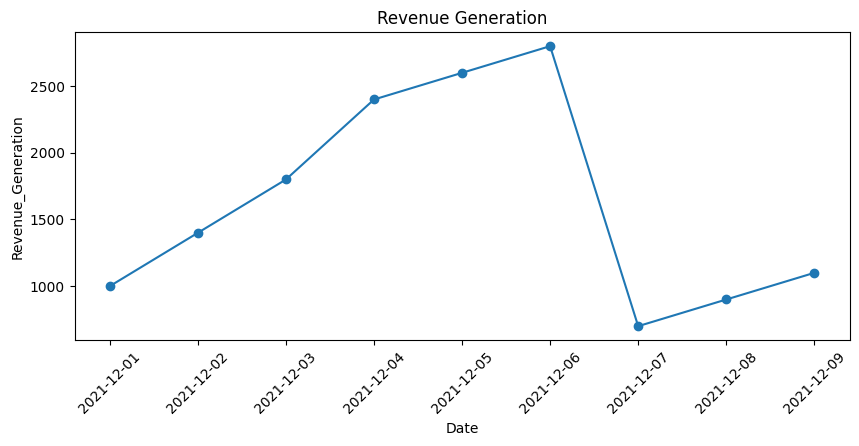

In [5]:
#  visualization
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Date_Time'], df['Revenue_Generation'], 'o-')
ax.set_title(u"Revenue Generation")
ax.set_ylabel("Revenue_Generation")
ax.set_xlabel("Date")
ax.set_xticks(df['Date_Time'])
ax.set_xticklabels(df['Date_Time'], rotation=45)
plt.show()

### `What is lag?`
- It is one data point behind w.r.t time period

In [6]:
df_1 = df.copy(deep=True)
for i in range(1, 9):
    df_1[f"Revenue_Generation_Lag{i}"] = df_1['Revenue_Generation'].shift(i)

display(HTML(df_1.to_html()))

,Date_Time,Revenue_Generation,Revenue_Generation_Lag1,Revenue_Generation_Lag2,Revenue_Generation_Lag3,Revenue_Generation_Lag4,Revenue_Generation_Lag5,Revenue_Generation_Lag6,Revenue_Generation_Lag7,Revenue_Generation_Lag8
0,2021-12-01,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-02,1400,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-12-03,1800,1400.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-12-04,2400,1800.0,1400.0,1000.0,NaN,NaN,NaN,NaN,NaN
4,2021-12-05,2600,2400.0,1800.0,1400.0,1000.0,NaN,NaN,NaN,NaN
5,2021-12-06,2800,2600.0,2400.0,1800.0,1400.0,1000.0,NaN,NaN,NaN
6,2021-12-07,700,2800.0,2600.0,2400.0,1800.0,1400.0,1000.0,NaN,NaN
7,2021-12-08,900,700.0,2800.0,2600.0,2400.0,1800.0,1400.0,1000.0,NaN
8,2021-12-09,1100,900.0,700.0,2800.0,2600.0,2400.0,1800.0,1400.0,1000.0


### `Random 2 Variables Data`

data1: mean=97.500 stdv=23.888
data2: mean=145.400 stdv=31.296


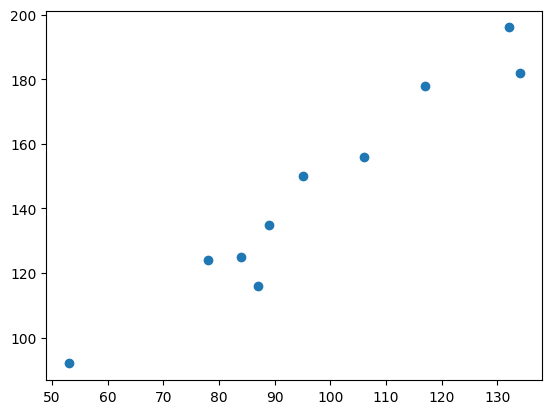

In [7]:
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(10) + 100
data1 = [int(x) for x in data1]
data2 = data1 + (10 * randn(10) + 50)
data2 = [int(x) for x in data2]

# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))

# plot
plt.scatter(data1, data2)
plt.show()

### `Stats From Scratch`

In [8]:
# cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
# np.sum((arr-mean)**2)

print("data1 --> ", list(data1))
print("data2 --> ", list(data2))

print("len(list(data1)) --> ", len(list(data1)))
print("len(list(data2)) --> ", len(list(data2)))

data1_mean = round(np.sum(data1)/len(data1),3)
data2_mean = round(np.sum(data2)/len(data2),3)

print("data1_mean --> ", data1_mean)
print("data2_mean --> ", data2_mean)

data1_variance = round((np.sum([(x - data1_mean) ** 2 for x in data1]) / len(data1)),3)
data2_variance = round((np.sum([(x - data2_mean) ** 2 for x in data2]) / len(data2)),3)
print("data1_variance --> ", data1_variance)
print("data2_variance --> ", data2_variance)

data1_stdev = round(math.sqrt(data1_variance),3)
data2_stdev = round(math.sqrt(data2_variance),3)
print("data1_stdev --> ", data1_stdev)
print("data2_stdev --> ", data2_stdev)

covariance_x_y_arr = round((np.sum((data1 - data1_mean)*(data2 - data2_mean))/(len(data1)-1)),3)
print("covariance_x_y_arr --> ", covariance_x_y_arr)

covariance_x_x_arr = round((np.sum((data1 - data1_mean)*(data1 - data1_mean))/(len(data1)-1)),3)
print("covariance_x_x_arr --> ", covariance_x_x_arr)

# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
# corr_coeff = round(((covariance_x_y_arr) / (data1_stdev * data2_stdev)),3)
# print("corr_coeff --> ", corr_coeff)

data1 -->  [132, 87, 89, 78, 117, 53, 134, 84, 106, 95]
data2 -->  [196, 116, 135, 124, 178, 92, 182, 125, 156, 150]
len(list(data1)) -->  10
len(list(data2)) -->  10
data1_mean -->  97.5
data2_mean -->  145.4
data1_variance -->  570.65
data2_variance -->  979.44
data1_stdev -->  23.888
data2_stdev -->  31.296
covariance_x_y_arr -->  806.889
covariance_x_x_arr -->  634.056


### `Stats Using Libraries`

In [9]:
print("data1 --> ", list(data1))
print("data2 --> ", list(data2))

data1_mean = round(np.mean(data1),3)
data2_mean = round(np.mean(data2),3)

print("data1_mean --> ", data1_mean)
print("data2_mean --> ", data2_mean)

data1_variance = round(np.var(data1),3)
data2_variance = round(np.var(data2),3)

print("data1_variance --> ", data1_variance)
print("data2_variance --> ", data2_variance)

data1_stdev = round(np.std(data1),3)
data2_stdev = round(np.std(data2),3)

print("data1_stdev --> ", data1_stdev)
print("data2_stdev --> ", data2_stdev)

covariance_x_y_arr = np.cov(data1, data2)
print("covariance_x_y_arr : ", round(covariance_x_y_arr[0][1],3))
print(covariance_x_y_arr)

covariance_x_x_arr = np.cov(data1, data1)
print("covariance_x_x_arr : ", round(covariance_x_x_arr[0][1],3))
# print(covariance_x_x_arr)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation[pearsonr]: %.3f' % corr) 
sigma = np.corrcoef(data1,data2)
print('Pearsons correlation[np.corrcoef]: {}'.format(round(sigma[0][1],3))) 

data1 -->  [132, 87, 89, 78, 117, 53, 134, 84, 106, 95]
data2 -->  [196, 116, 135, 124, 178, 92, 182, 125, 156, 150]
data1_mean -->  97.5
data2_mean -->  145.4
data1_variance -->  570.65
data2_variance -->  979.44
data1_stdev -->  23.888
data2_stdev -->  31.296
covariance_x_y_arr :  806.889
[[ 634.05555556  806.88888889]
 [ 806.88888889 1088.26666667]]
covariance_x_x_arr :  634.056
Pearsons correlation[pearsonr]: 0.971
Pearsons correlation[np.corrcoef]: 0.971


### `ACF - Manual Calculation`

In [10]:
def cal_acf(x, nlags):
    """
    acf = Auto Correlation Factor = Correlation between existing lists with its own lagged values i.e., nothing but same as Pearson's correlation
    Where in general we check correlation between 2 different variables list, but auto correlation we check on same list with its previous lagged values
    Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
    """
    x = np.array(x)
    mean_x = np.mean(x)
    print("     >> mean_x --> ", mean_x)
    length_x = x.shape[0]
    print("     >> length_x --> ", length_x)
    print("     >> (length_x-nlags) --> ", (length_x-nlags))
    print("     >> x[:(length_x-nlags)] --> ", x[:(length_x-nlags)])
    print("     >> x[nlags:] --> ", x[nlags:])
    c_0 = np.mean((x-mean_x) **2) # stdv(X1) - On total array 
    c_k = np.sum((x[:(length_x-nlags)] - mean_x) * (x[nlags:] - mean_x)) / length_x 
    # X1(List with last lagged values) : x[:(length_x-nlags)]
    # X2(List from present values)[nlags:]
    # covariance(X1, X2) - Correlation b/n (X1, X2), which is not between -1 to 1(rather it is real value -inf. to +inf.). Usually, which maintained in Pearson's correlation coefficient. 
    # Higher the covariance value means higher the correlation between X1 & X2, and vice verse.
    # Ex:-
    # x                    -->  [1000 1400 1800 2400 2600 2800  700  900 1100]
    # nlags:               -->  1
                                # Think 1000 as last 1 lagged value
    # x[:(length_x-nlags)] -->  ['1000' 1400 1800 2400 2600 2800  700  900] --> List with last lagged values
                                # Think 1400 as present value
    # x[nlags:]            -->  ['1400' 1800 2400 2600 2800  700  900 1100] --> List from present values
    # To find covarinace that is not scaled correlation, both lagged & present lists are maintained same size
    r_k = c_k / c_0
    # print("r_k --> ", r_k)
    return r_k


auto_correl_list = []
x = df_1['Revenue_Generation'].tolist()
print("x --> ", x)
print("len(x) --> ", len(x))
no_of_lags = 8
for i in range(1,no_of_lags+1):
    print("Lags - {}".format(i))
    auto_correl = round(cal_acf(x=x, nlags=i),3)
    auto_correl_list.append(auto_correl)
    print("-----"*10)
    print("     >> auto_correl --> ", auto_correl)
    print("-----"*10)

x -->  [1000, 1400, 1800, 2400, 2600, 2800, 700, 900, 1100]
len(x) -->  9
Lags - 1
     >> mean_x -->  1633.3333333333333
     >> length_x -->  9
     >> (length_x-nlags) -->  8
     >> x[:(length_x-nlags)] -->  [1000 1400 1800 2400 2600 2800  700  900]
     >> x[nlags:] -->  [1400 1800 2400 2600 2800  700  900 1100]
--------------------------------------------------
     >> auto_correl -->  0.413
--------------------------------------------------
Lags - 2
     >> mean_x -->  1633.3333333333333
     >> length_x -->  9
     >> (length_x-nlags) -->  7
     >> x[:(length_x-nlags)] -->  [1000 1400 1800 2400 2600 2800  700]
     >> x[nlags:] -->  [1800 2400 2600 2800  700  900 1100]
--------------------------------------------------
     >> auto_correl -->  -0.097
--------------------------------------------------
Lags - 3
     >> mean_x -->  1633.3333333333333
     >> length_x -->  9
     >> (length_x-nlags) -->  6
     >> x[:(length_x-nlags)] -->  [1000 1400 1800 2400 2600 2800]
     >> x

In [11]:
print("Auto Correlation on Lagged Values : Manual Calculation --> ", auto_correl_list)

Auto Correlation on Lagged Values : Manual Calculation -->  [np.float64(0.413), np.float64(-0.097), np.float64(-0.507), np.float64(-0.419), np.float64(-0.208), np.float64(0.133), np.float64(0.116), np.float64(0.067)]


### `ACF - Using Library [statsmodels]`

In [12]:
no_of_lags = 9
acf_list = acf(df_1["Revenue_Generation"],nlags=no_of_lags).tolist()
acf_list = [round(x, 3) for x in acf_list]
print("Auto Correlation on Lagged Values : Using Libraries --> ", acf_list)

Auto Correlation on Lagged Values : Using Libraries -->  [1.0, 0.413, -0.097, -0.507, -0.419, -0.208, 0.133, 0.116, 0.067]


### `About ACF & Its Plot`

- Blue bars on an ACF plot above are the error bands, and anything within these bars is not statistically significant. 
- It means that correlation values outside of this area are very likely a correlation and not a statistical fluke. 
- The confidence interval is set to 95% by default.
- Notice that for a lag zero, ACF is always equal to one, which makes sense because the signal is always perfectly correlated with itself.
- To summarize, autocorrelation is the correlation between a time series (signal) and a delayed version of itself, while the ACF plots the correlation coefficient against the lag, and it’s a visual representation of autocorrelation.

Revenue_Generation -->  [1000, 1400, 1800, 2400, 2600, 2800, 700, 900, 1100]


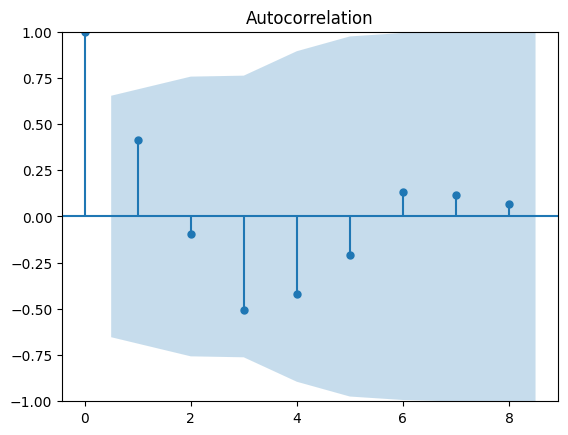

In [13]:
print("Revenue_Generation --> ", df_1["Revenue_Generation"].tolist())

sm.graphics.tsa.plot_acf(df_1["Revenue_Generation"], lags=8)
plt.show()

- **`Observation`**
- From the plot we can see that even previous 1st lagged values has no effect/correlation on present value. 
- This is may be due to having high change difference values in the Revenue_Generation column i.e., ... 2800 -> 700 ... 

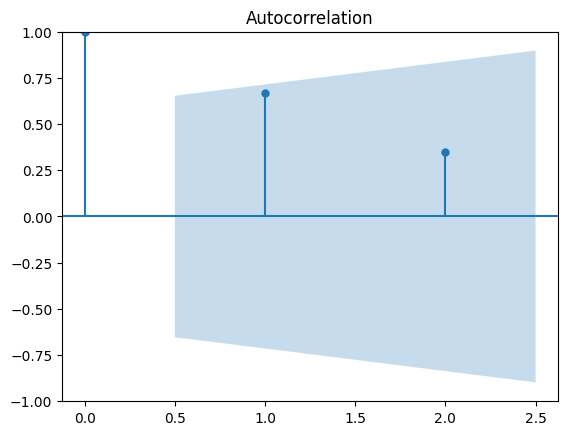

In [14]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9]

sm.graphics.tsa.plot_acf(data, lags=2)
plt.show()

- **`Observation`**
-  In each lag level. Correlation tries to think i.e.,
  - Lag 1 : Taking previous value 1 helping to predict/correlate/affect values 2,3....
  - Lag 2 : Taking previous values 1,2 helping to predict/correlate/affect values 3,4....    
- Data is less & It doesn't really think last lagged values that may lag-1 or lag-2 values affecting further values

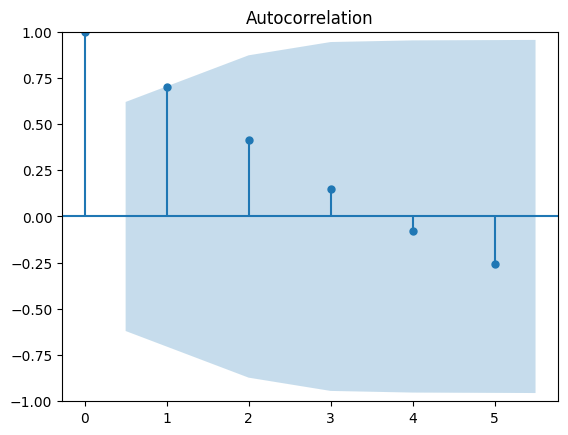

In [15]:
data = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]

sm.graphics.tsa.plot_acf(data, lags=5)
plt.show()

- **`Observation`**
- Here difference between each value is less. So there is a chance last lagged value has affect on present values.  
- This is same like above. But here, it tries to check correlation between present values & taking last 3, 4, 5 lagged values list too.
- But data list is small, so on overall correlation between any lagged values list might not be seems to be affective. 
- Because all lagged values correlation are under the blue region.

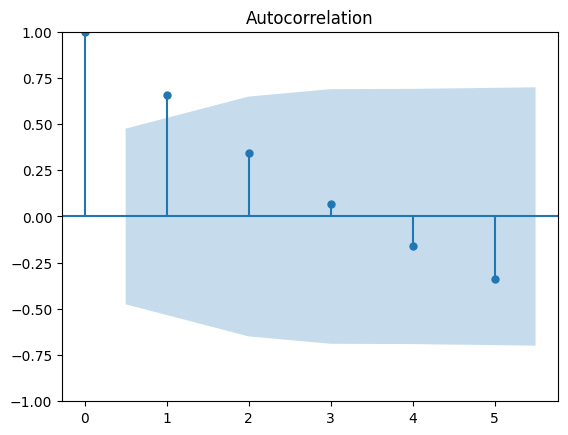

In [16]:
data = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 1.10, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16]

sm.graphics.tsa.plot_acf(data, lags=5)
plt.show()

- **`Observation`**
- Now data list is longer
- Present value & previous value is similar with decimal change.
- Taking Lagged-1 values list has strong correlation between the present values. As lag-1 is exceeds the blue region.
- Ex:- 
  - (x1)Lagged Values  [1  , 1.1, 1.2, 1.3 ...]
  - (x2)Present Values [1.1, 1.2, 1.3, 1.4 ...]
  - Correlation(Lagged Values, Present Values) - is strong
  - Meaning 
  - when x1(1) raise x2(1.1) raises, 
  - when x1(1.1) raise x2(1.2) raises,
  - so on, this seems to be strong correlation  
- Note : Lagged-0 will always be 1. As it is correlation within itself

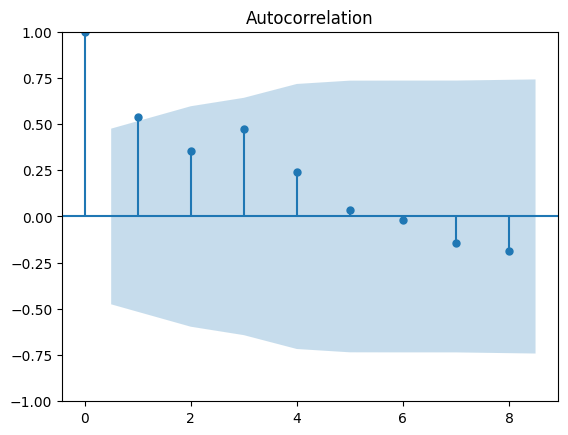

In [17]:
temperature_data = [68.2,65.6,67.2,67.8,66.1,66.5,68.2,67.8,68.4,68.6,68.3,69,68.7,68.9,69,69.5,69.7]

sm.graphics.tsa.plot_acf(temperature_data, lags=8)
plt.show()

- **`Observation`**
- Now data list is longer
- Present value & previous value is mostly similar with little value change.
- Taking Lagged-1 values list has a little correlation between the present values. As lag-1 is exceeds a little the blue region.

### `Important - Note`
- ACF considers the intermediate lagged values too in terms of finding correlation factor between present values list & desired lagged values list.
- In case we want to check correlation between present values & lag-3 values list. Then this lag-3 list also has included (lag-2 & lag-1) values too in consideration of finding correlation factor 
- Check above examples for reference. 

### `PACF - Manual Calculation`

In [18]:
def cal_my_pacf_ols(x, y, nlags=None):
    pacf = np.empty(nlags+1) * 0 # This is to store pacf lags regression coefficients 
    # pacf[0] = 1.0 # Lag-0 : Regression Coefficient always - 1. Because Finding Regression Coefficient where indep.var & dep.var is same
    # print("     >> pacf --> ", pacf)
    # preparing data
    x, x0 = lagmat(x, nlags, original="sep")
    # print("     >> x(data preparation) --> ")
    # print(x)
    print("     >> Independent Variables : x[nlags:, :(nlags+1)]")
    print(x[nlags:, :(nlags+1)])
    print("     >> Dependent Variable : y[nlags:]")
    print(y[nlags:])    
                               # Think 1000 as last 1 lagged value
    # Independent Variables : ['[1000.]' [1400.] [1800.] [2400.] [2600.] [2800.] [ 700.] [ 900.]] # List with last lagged values
                               # Think 1400 as present value
    # Dependent Variale :     ['1400',    1800,   2400,   2600,   2800,   700,     900,    1100 ] # List from present values

    ##### Trying to find regresison coefficient of indep.variables using least-square method : Start #####
    # indep.variables : Lagged values list. Here Lagged-1 values list.
    # dep.variable    : Current values list
    # So we are finding lagged-1 regression cofficient
    x = add_constant(x)
    params = np.linalg.lstsq(x[nlags:, :(nlags+1)], y[nlags:])[0]
    params = ["{:.8f}".format(float(coeff)) for coeff in params]
    print("     >> Regression Coefficients : {}".format(params))
    pacf[nlags] = params[-1]
    ##### Trying to find regresison coefficient of indep.variables using least-square method : Stop #####
    print("     >> Lag - {} Coeff : ".format(nlags), params[-1])
    return params[-1]


partial_auto_correl_list = []
X = df_1['Revenue_Generation'].tolist()
Y = X
print("X --> ", X)
print("Y --> ", Y)
print("len(X) --> ", len(X))
no_of_lags = 3
for i in range(1, no_of_lags+1):
    print("-----"*10)
    print("-----"*10)
    print("Lags - {}".format(i))
    print("-----"*10)
    print("-----"*10)
    partial_auto_correl = round(float(cal_my_pacf_ols(X, Y, nlags=i)),3)
    partial_auto_correl_list.append(partial_auto_correl)
    print("-----"*10)
    print("     >> partial_auto_correl --> ", partial_auto_correl)
    print("-----"*10)

X -->  [1000, 1400, 1800, 2400, 2600, 2800, 700, 900, 1100]
Y -->  [1000, 1400, 1800, 2400, 2600, 2800, 700, 900, 1100]
len(X) -->  9
--------------------------------------------------
--------------------------------------------------
Lags - 1
--------------------------------------------------
--------------------------------------------------
     >> Independent Variables : x[nlags:, :(nlags+1)]
[[1000.]
 [1400.]
 [1800.]
 [2400.]
 [2600.]
 [2800.]
 [ 700.]
 [ 900.]]
     >> Dependent Variable : y[nlags:]
[1400, 1800, 2400, 2600, 2800, 700, 900, 1100]
     >> Regression Coefficients : ['977.26793249', '0.43248945']
     >> Lag - 1 Coeff :  0.43248945
--------------------------------------------------
     >> partial_auto_correl -->  0.432
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Lags - 2
--------------------------------------------------
------------------------------------

In [19]:
print("partial_auto_correl_list --> ", partial_auto_correl_list)

partial_auto_correl_list -->  [0.432, -0.37, -1.025]


### `Important - Note`
- If you observe in Lagged - 1 (pacf calculation) regression coffiecients, we are taking partial_auto_correlation factor as lagged-1 variable coefficient only w.r.t present values list i.e., dependent variable
- In case Lagged - 2 (pacf calculation) regression coffiecients, we will take Lagged - 2 variable coefficient only as partial_auto_correlation factor w.r.t present values list i.e., dependent variable
- Similarly, in Lagged - 3 (pacf calculation) regression coffiecients, we will take Lagged - 3 variable coefficient only as partial_auto_correlation factor w.r.t present values list i.e., dependent variable
- This is because, as pacf - name suggests, it is partial auto correlation factor, unlike (acf) Auto correlation Factor it doen't include other lagged factors.
- Ex: 
  - ACF : Present values list & lagged - 3 values list, it considers lagged-2 & lagged-1 values also into consideration for correlation factor.
  - But PACF : Present values list & lagged - 3 values list, it considers only lagged-3 variable(i.e., indep. variable) regression coeff. as correlation factor, but doesn't include lagged-2 & lagged-1 variables(i.e., indep. variables) regression coeffs. into correlation factor.
- It means it directly checks how agged - 3 values list (indep. variable) has impact on Present values list(deped. variable)

### `PACF - Using Library [statsmodels]`

In [20]:
pacf_correlation_list = pacf(df_1["Revenue_Generation"],nlags=3,method='ols').tolist()
pacf_correlation_list = [round(x, 3) for x in pacf_correlation_list]
print("pacf_correlation_list --> ", pacf_correlation_list)

pacf_correlation_list -->  [1.0, 0.432, -0.37, -1.025]


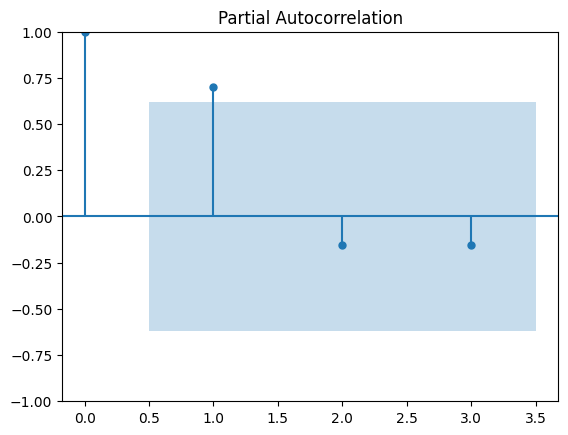

In [21]:
data = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]

sm.graphics.tsa.plot_pacf(data, lags=3)
plt.show()

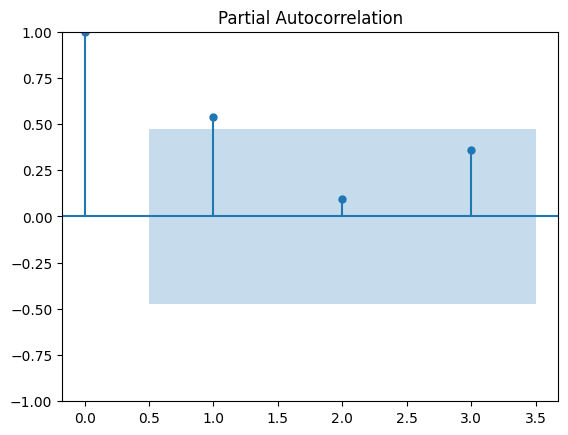

In [22]:
temperature_data = [68.2,65.6,67.2,67.8,66.1,66.5,68.2,67.8,68.4,68.6,68.3,69,68.7,68.9,69,69.5,69.7]

sm.graphics.tsa.plot_pacf(temperature_data, lags=3)
plt.show()